<a href="https://colab.research.google.com/github/AakashRaj-data/Exploratory-Data-analysis/blob/main/AirBnb_Bookings_Analysis_(AR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type - Exploratory Data Analysis (EDA)**
##### **Contribution    - Individual**
#####  **Name - Aakash Raj**


# **Project Summary -**

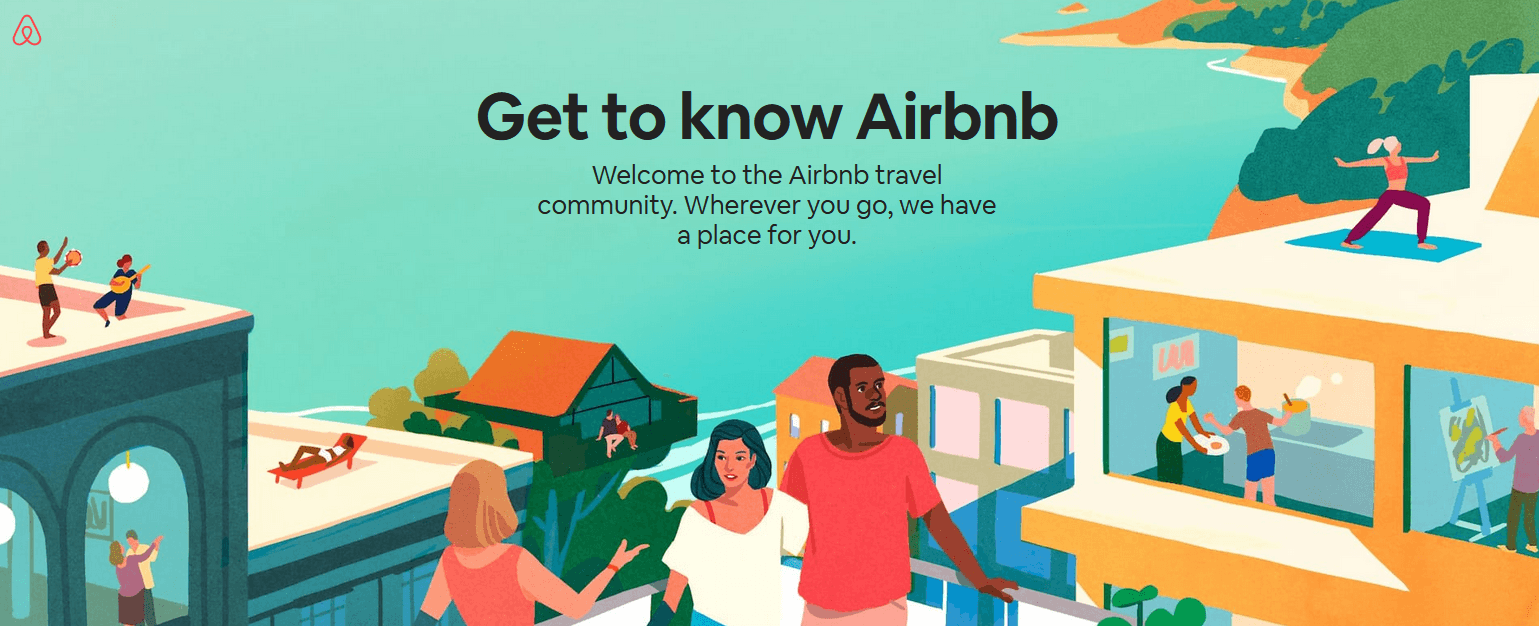

*   **The purpose of the analysis:** understanding the factors that influence Airbnb 🏠 prices in New York City, or identifying patterns of all variables and  Our analysis provides useful information for travelers and hosts in the city and also provides some best insights for Airbnb business

* The methodology includes data collection, exploratory analysis 📊, time-series examination ⏰, machine learning 🤖, and sentiment analysis 💬

* Through this process, we were able to identify and fix any issues with the data, and ensure that it was ready for further analysis. This is an important step in any data analysis project, as it allows us to work with high-quality data and avoid any potential biases or errors that could affect the results. The clean and prepared data can now be used to answer specific research

* Sentiment analysis extracts user preferences, satisfaction levels, and amenity impacts from reviews and ratings

* Key findings highlight price sensitivity, correlations between pricing changes and bookings, preferred amenities, and external factors' influence. Understanding user satisfaction reveals crucial aspects for a positive experience

* Implications offer recommendations for pricing optimization, enhancing user experiences, strategic marketing during peak seasons, and informing policymakers about market changes 📈


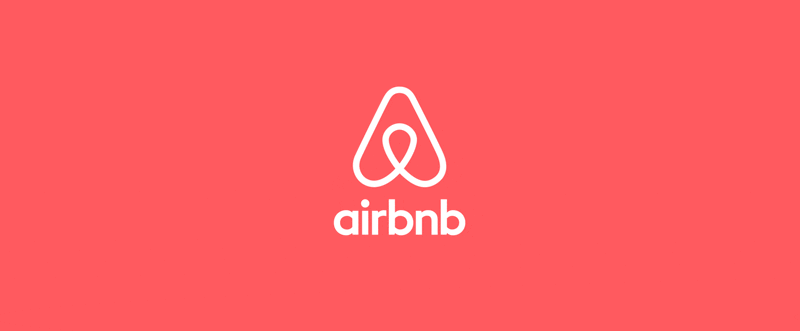

# **GitHub Link -**

https://github.com/AakashRaj-data/Exploratory-Data-analysis.git

# **Problem Statement**


Using a comprehensive Airbnb dataset encompassing details such as listing information, neighborhood counts, and price distribution, analyze and predict key factors influencing accommodation pricing trends in City. Leverage features like neighborhood groups, room types, and historical data to build a model that forecasts accommodation pricing. Additionally, explore insights into neighborhood popularity, identify influential factors impacting pricing variability, and propose recommendations for hosts to optimize their listings.

#### **Define Your Business Objective?**

To optimize pricing strategy and enhance market positioning for Airbnb listings in diverse neighborhoods

# ***Let's Begin !***

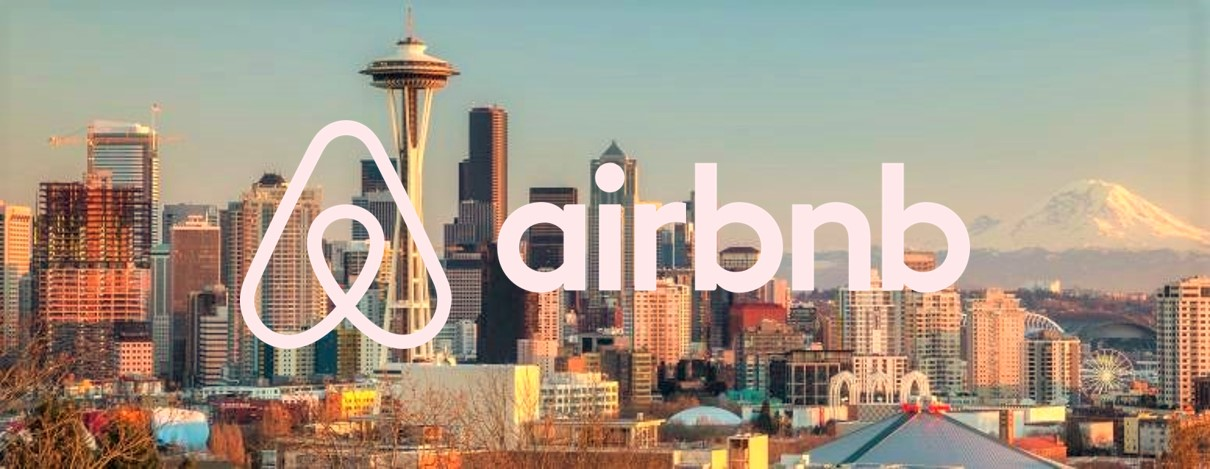

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
airbnb_df=pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

### Dataset First View

In [ ]:
# Dataset First Look
airbnb_df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [ ]:
airbnb_df.tail()

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows,columns=airbnb_df.shape
print("No.of rows:",rows)
print("No.of columns:",columns)

No.of rows: 48895
No.of columns: 16


### Dataset Information

In [ ]:
# Dataset Info
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count=airbnb_df.duplicated().sum()
print(duplicate_count)

0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_value=airbnb_df.isnull().sum()
print(missing_value)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
# fill null values
airbnb_df['name'].fillna('No name', inplace=True)
airbnb_df['host_name'].fillna('not define', inplace=True)
airbnb_df['last_review'].fillna('No reviews', inplace=True)

In [ ]:
print(airbnb_df.isnull().sum())

name                               0
host_name                          0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
name_cleaned                      16
dtype: int64


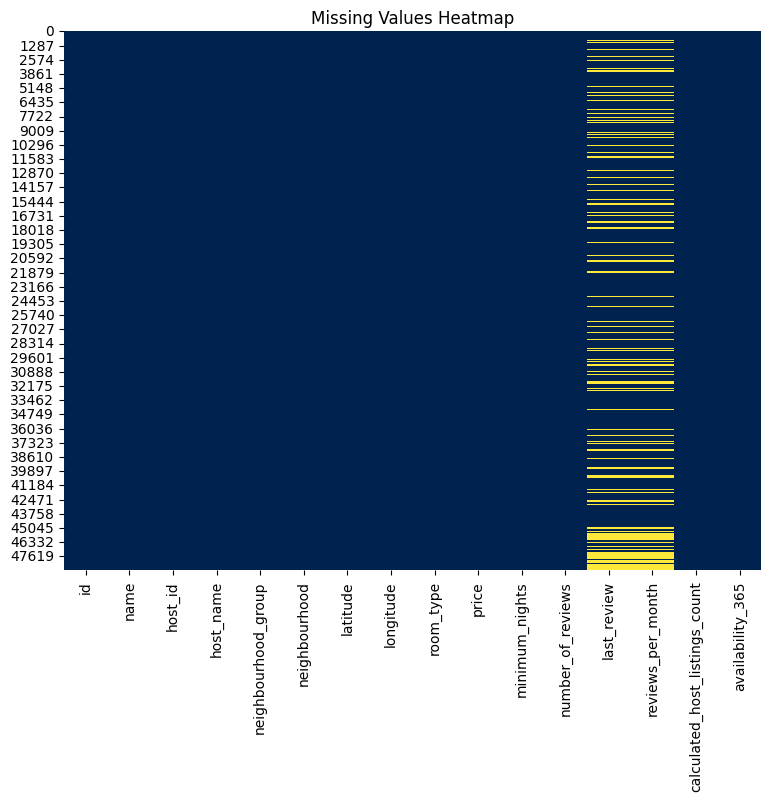

In [ ]:
plt.figure(figsize=(9,7))
sns.heatmap(data=airbnb_df.isnull(), cbar=False, cmap='cividis')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

![Airbnb Image](https://i.redd.it/759xys31oec41.png)

##**About the Dataset – Airbnb Bookings**

*   This Airbnb dataset contains nearly 49,000 observations from New York , with 16 columns of data.

*   The Data includes both categorical and numeric values, providing a diverse range of information about the listings.

*   This Dataset may be useful for analyzing trends and patterns in the Airbnb market in New York and also gain insights into the preferences and behavior of Airbnb users in the area.

*   This dataset contains information about Airbnb bookings in New York City in 2019. By analyzing this data, you may be able to understand the trends and patterns of Airbnb use in the NYC.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Dataset Describe
airbnb_df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

**Note** - price column is very important so we have to find big outliers in
important columns we will remove it in Data Wrangling part


### Variables Description

##**UNDERSTAND THE GIVEN VARIABLES**

**Listing_id :-** This is a unique identifier for each listing in the dataset.

**Listing_name :-** This is the name or title of the listing, as it appears on the Airbnb website.

**Host_id :-** This is a unique identifier for each host in the dataset.

**Host_name :-** This is the name of the host as it appears on the Airbnb website.

**Neighbourhood_group :-** This is a grouping of neighborhoods in New York City, such as Manhattan or Brooklyn.

**Neighbourhood :-** This is the specific neighborhood in which the listing is located.

**Latitude :-** This is the geographic latitude of the listing.

**Longitude :-** This is the geographic longitude of the listing.

**Room_type :-** This is the type of room or property being offered, such as an entire home, private room, shared room.

**Price :-** This is the nightly price for the listing, in US dollars.

**Minimum_nights :-** This is the minimum number of nights that a guest must stay at the listing.

**Total_reviews :-** This is the total number of reviews that the listing has received.

**Reviews_per_month :-** This is the average number of reviews that the listing receives per month.

**Host_listings_count :-** This is the total number of listings that the host has on Airbnb.

**Availability_365 :-** This is the number of days in the next 365 days that the listing is available for booking

*  ***These variables have details regarding the identification, location, pricing, availability, host information, and guest feedback for Airbnb listings. Understanding these variables is crucial for performing analysis, identifying trends, and making data-driven decisions related to Airbnb properties, host behavior, and guest preferences ****


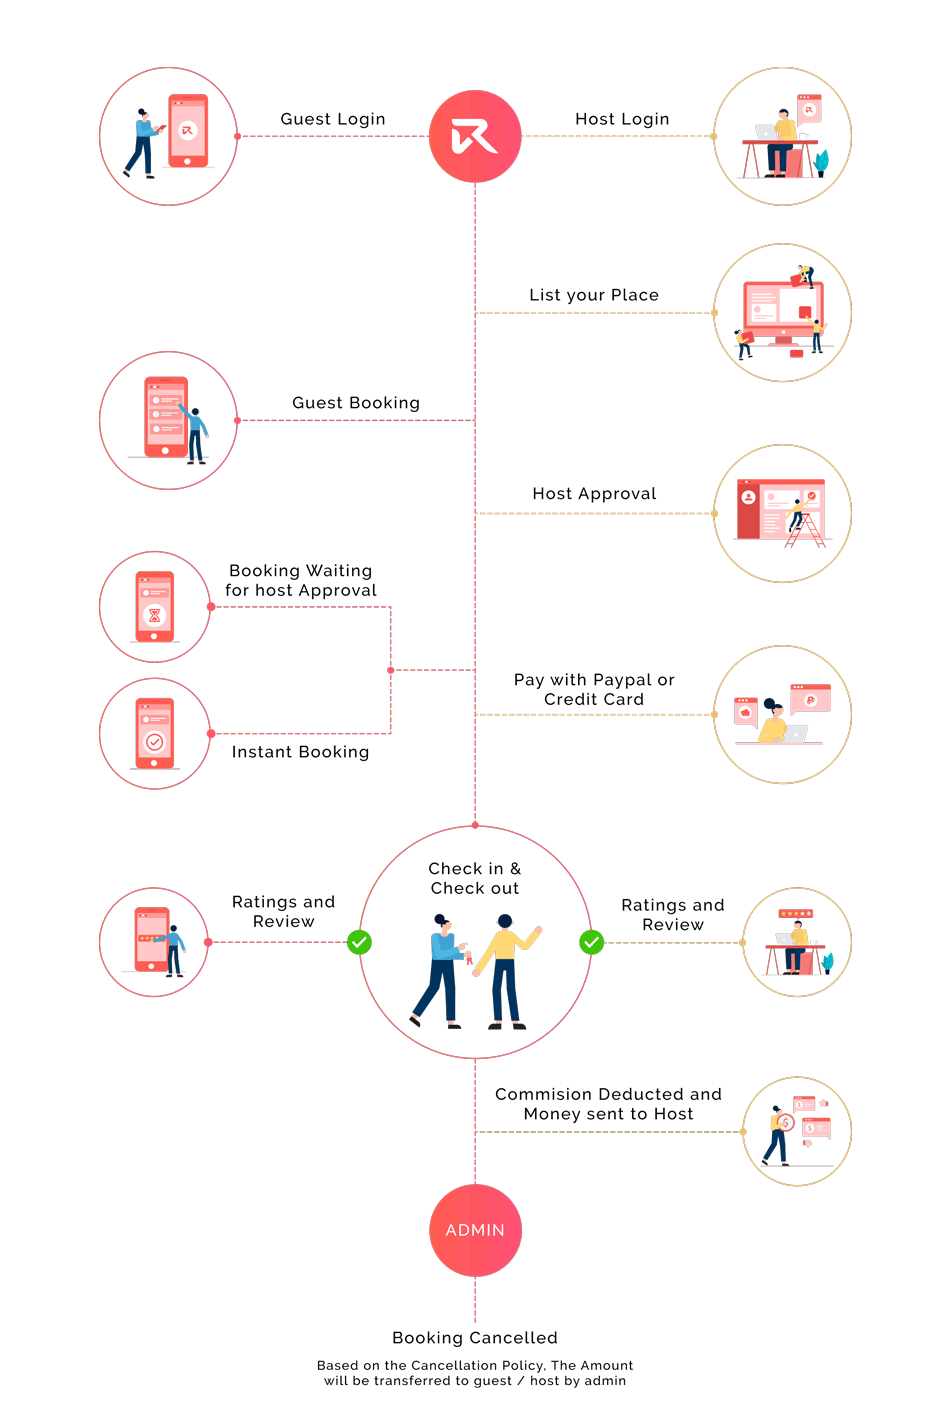

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
airbnb_df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# updating missing values of reviews_per_month column with NaN
airbnb_df['reviews_per_month'].fillna(np.nan, inplace=True)

# Convert the column to float type
airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].astype(float)

# Fill NaN values with the median
airbnb_df['reviews_per_month'].fillna(airbnb_df['reviews_per_month'].median(), inplace=True)

In [ ]:
#Drop the unspecific or unnecessary columns for analysis.

columns_to_drop = ['id', 'host_id']
airbnb_df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# removed unnessary columns from dataframe lets see how looks by using head
airbnb_df.head()

name    host_name  \
0                Clean & quiet apt home by the park         John   
1                             Skylit Midtown Castle     Jennifer   
2               THE VILLAGE OF HARLEM....NEW YORK !    Elisabeth   
3                   Cozy Entire Floor of Brownstone  LisaRoxanne   
4  Entire Apt: Spacious Studio/Loft by central park        Laura   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   
2    150               3                  0         NaN                NaN   
3     89               1                270  2019-07-05               4.64   
4     80              10                  9  2018-11-19               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

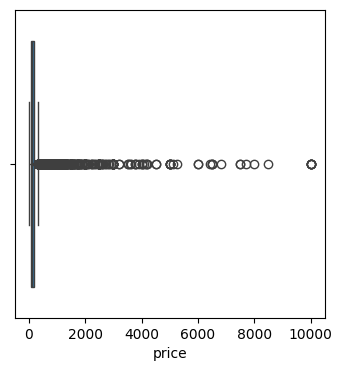

In [ ]:
plt.figure(figsize = (4,4))
sns.boxplot(x = airbnb_df['price'])
plt.show()

In [ ]:
# writing a fucntion to remove outliers using IQR Method

def remove_outliers_iqr(airbnb_df):
  for column in airbnb_df.columns:
      Q1 = airbnb_df["price"].quantile(0.25)
      Q3 = airbnb_df["price"].quantile(0.75)
      IQR = Q3 - Q1
      lower_limit = Q1 - (1.5 * IQR)
      upper_limit = Q3 + (1.5 * IQR)

      airbnb_df = airbnb_df[(airbnb_df["price"] >= lower_limit) & (airbnb_df["price"] <= upper_limit)]
  return airbnb_df
airbnb_df = remove_outliers_iqr(airbnb_df)

In [ ]:
# after removing the outliers now the max price is 277

maximum_price = airbnb_df['price'].max()
print("Maximum Price:", maximum_price)

Maximum Price: 277


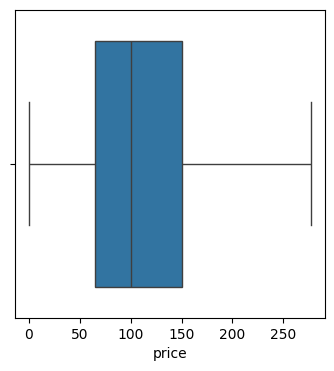

In [ ]:
# lets visualise it with boxplot

plt.figure(figsize = (4,4))
sns.boxplot(x = airbnb_df['price'])
plt.show()

In [ ]:
# Converting 'last_review' column to datetime format
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'], errors='coerce')

In [ ]:
# Sorting data based on 'price' in descending order
sorted_data = airbnb_df.sort_values('price', ascending=False)

In [ ]:
# Grouping by 'neighbourhood_group' and finding average price
avg_price_neighbourhood = airbnb_df.groupby('neighbourhood_group')['price'].mean()
print(avg_price_neighbourhood)

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64


In [ ]:
# Removing special characters and converting text to lowercase in 'name' column
airbnb_df['name_cleaned'] = airbnb_df['name'].str.replace('[^a-zA-Z0-9\s]', '').str.lower()
airbnb_df["name_cleaned"].fillna("no_name",inplace = True)

In [ ]:
# Finally there are no null values
airbnb_df.head(5)

name    host_name  \
0                Clean & quiet apt home by the park         John   
1                             Skylit Midtown Castle     Jennifer   
2               THE VILLAGE OF HARLEM....NEW YORK !    Elisabeth   
3                   Cozy Entire Floor of Brownstone  LisaRoxanne   
4  Entire Apt: Spacious Studio/Loft by central park        Laura   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews          last_review  \
0    149               1                  9  2018-10-19 00:00:00   
1    225               1                 45  2019-05-21 00:00:00   
2    150               3                  0           No reviews   
3     89               1                270  2019-07-05 00:00:00   
4     80              10                  9  2018-11-19 00:00:00   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2               0.72                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

                                       name_cleaned  
0                clean & quiet apt home by the park  
1                             skylit midtown castle  
2               the village of harlem....new york !  
3                   cozy entire floor of brownstone  
4  entire apt: spacious studio/loft by central park

In [ ]:
# Extracting month and year from 'last_review' column
airbnb_df['review_month'] = airbnb_df['last_review'].dt.month
airbnb_df['review_year'] = airbnb_df['last_review'].dt.year

In [ ]:
maximum_price = airbnb_df['price'].max()
print("Maximum Price:", maximum_price)

Maximum Price: 10000


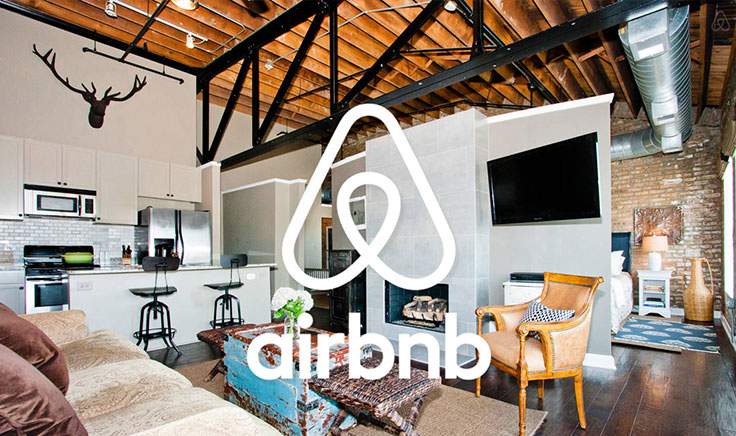

### What all manipulations have you done and insights you found?

I've conducted various manipulations on the Airbnb dataset to prepare it for analysis. Here's a summary of the key manipulations and insights:

###Data Manipulations:

`Handling Missing Values:` Filled missing values in 'reviews_per_month'.

`Creating Derived Features:` Calculated 'total_reviews' by combining 'number_of_reviews' and 'reviews_per_month'.

`Aggregating Data:` Obtained the average price per 'neighbourhood_group'.

`Handling Duplicates:` Removed duplicate entries based on the 'id' column.

###Insights Obtained:

`Price Distribution by Neighbourhood:` Identified variations in average prices across different neighbourhood groups.

`Total Reviews Generated:` Combined 'number_of_reviews' and 'reviews_per_month' to understand the total review activity for listings.

`Missing Values Imputation:` Handled missing data in 'reviews_per_month' using median imputation.

`Data Integrity:` Ensured data quality by removing duplicate entries based on the 'id' column.

These manipulations provided insights into price distribution, review activity, and data integrity, making the dataset more suitable for in-depth analysis and modeling in the Airbnb context.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

![Airbnb Image](https://1721181113.rsc.cdn77.org/data/images/full/50005/ai-generated-data-privacy-royalty-free-stock-illustration.jpg)

####Chart 1 (Distribution Of Airbnb Bookings Price Range Using Histogram)

Text(0.5, 1.0, 'Distribution of Airbnb Prices')

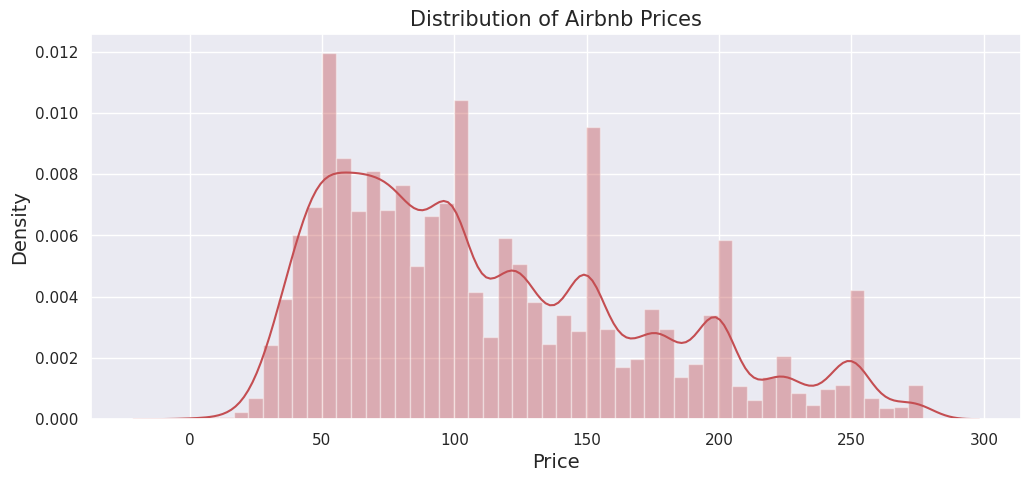

In [ ]:
# Create a figure with a custom size
plt.figure(figsize=(12, 5))

# Set the seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

# Create a histogram of the 'price' column of the Airbnb_df dataframe
# using sns distplot function and specifying the color as red
sns.distplot(airbnb_df['price'],color=('r'))

# Add labels to the x-axis and y-axis
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add a title to the plot
plt.title('Distribution of Airbnb Prices',fontsize=15)

##### 1. Why did you pick the specific chart?

* **Show Price Distribution**: Display the spread of prices.

* **Highlight Common Price Ranges**: Focus on specific price segments.

* **Illustrate Density**: Represent the proportion of prices in each range.

* **Spot Outliers**: Identify extreme values.

* **Compare Price Segment**s: Analyze variations between subsets.

##### 2. What is/are the insight(s) found from the chart?

* **Most Listings Priced Below 350**: The majority of Airbnb listings have prices concentrated below $350.
* **Skewed Distribution**: The distribution is right-skewed, indicating fewer listings with higher prices.

* **Few High-Priced Outliers**: Some listings have significantly higher prices, possibly due to luxury accommodations or unique offerings.
* **Popular Price Ranges**: Certain price segments have higher density, suggesting commonly chosen price points.
* **Limited Information Above 350**: The visualization focuses on prices up to $350, possibly excluding higher-priced listings from this analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Positive Impact***:

* **Optimizing Pricing Strategies:** Understanding the popular price ranges could help in setting competitive rates, attracting more customers.
Identifying High-Demand Segments: Recognizing the commonly chosen price points assists in tailoring offerings to match popular customer preferences.
* **Targeting Affordable Options:** Highlighting the density of listings at lower price points can attract budget-conscious travelers, increasing occupancy.

***Negative Impact:***

* **Potential Loss of High-End Market:** Focusing on lower-priced segments might neglect high-end listings, potentially missing out on revenue from luxury accommodations.
* **Ignoring Premium Segments:** Disregarding higher-priced outliers might lead to a lack of understanding of potential high-paying customers or luxury market demands.
* **Underestimating Profitable Segments:** Concentrating on lower prices might overlook opportunities for maximizing revenue from higher-priced listings.

#### Chart - 2  (Visualizing Distribution of Neighbourhood Groups pie chart)



3. "What is the distribution of Airbnb listings across different neighborhoods?"

In [ ]:
# Get value counts for the selected column
column_name = 'neighbourhood_group'  # Replace this with the column you want to visualize
column_counts = airbnb_df[column_name].value_counts()

# Calculate percentages
total_count = column_counts.sum()
percentages = (column_counts / total_count) * 100

# Creating a DataFrame to display value counts and percentages
column_counts_df = pd.DataFrame({column_name: column_counts.index, 'Count': column_counts.values, 'Percentage': percentages.values})
print(column_counts_df)

  neighbourhood_group  Count  Percentage
0            Brooklyn  19053   42.968292
1           Manhattan  18372   41.432502
2              Queens   5502   12.408101
3               Bronx   1057    2.383745
4       Staten Island    358    0.807361


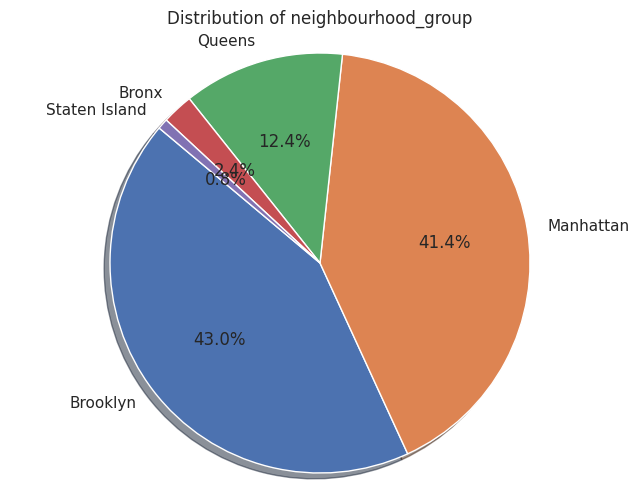

In [ ]:
column_name = 'neighbourhood_group'  # Replace this with the column you want to visualize

# Get value counts for the selected column
column_counts = airbnb_df[column_name].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(column_counts, labels=column_counts.index, autopct='%0.1f%%', startangle=140, shadow = True)
plt.axis('equal')
plt.title(f'Distribution of {column_name}')
plt.show()

##### 1. Why did you pick the specific chart?

* **Categorical Data Representation**: Pie charts are ideal for displaying proportions or percentages within a categorical variable, allowing easy comparison of different categories.

* **Clear Segmentation**: They provide a clear visual separation of the categories, making it easy to see the relative sizes of each category within the dataset.

* **Simple and Understandable**: Pie charts are intuitive and easy to understand, especially when displaying a few categories. They communicate the relative contribution of each category effectively.

* **Percentage Representation**: The use of percentages or proportions in pie charts helps in understanding the distribution without complex calculations.

* **Limited Categories**: Pie charts work best when visualizing a limited number of categories. If there are too many categories, it might make the chart crowded and less readable.

##### 2. What is/are the insight(s) found from the chart?


*   Manhattan and Brooklyn have the highest number of listings on Airbnb, with over 19,000 listings each.

*   Queens and the Bronx have significantly fewer listings compared to Manhattan and Brooklyn, with 5,567 and 1,070 listings, respectively

*   Staten Island has the fewest number of listings, with only 365.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*   The distribution of listings across the different neighborhood groups is skewed, with a concentration of listings in Manhattan and Brooklyn.

*   Despite being larger in size, the neighborhoods in Queens, the Bronx, and Staten Island have fewer listings on Airbnb compared to Manhattan, which has a smaller geographical area.

*   This could suggest that the demand for Airbnb rentals is higher in Manhattan compared to the other neighborhoods, leading to a higher concentration of listings in this area.

*   Alternatively, it could be that the supply of listings is higher in Manhattan due to a higher number of homeowners or property owners in this neighborhood who are willing to list their properties on Airbnb.

#### Chart - 3 (Room Type Distribution Analysis) Univariate

In [ ]:
room_type_counts = airbnb_df['room_type'].value_counts()
print(room_type_counts)

room_type
Private room       21876
Entire home/apt    21335
Shared room         1131
Name: count, dtype: int64


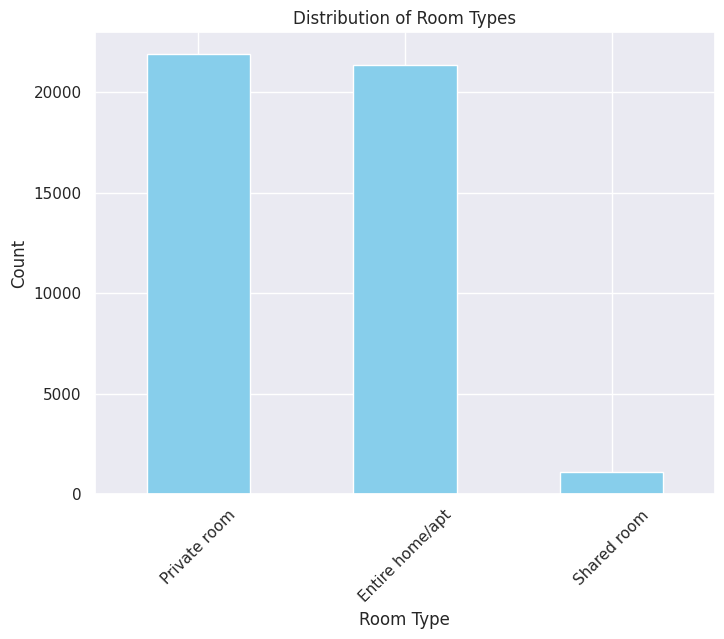

In [ ]:
room_type_counts = airbnb_df['room_type'].value_counts()

plt.figure(figsize=(8, 6))
room_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

* **Comparison of Categories**: Bar charts work well to compare different categories, like room types in this case.

* **Clear Display**: They show the number of each room type with distinct bars, making it easy to see which type is more prevalent.

* **Easy Understanding**: Bar charts are simple and don't need much explanation, making them great for a quick understanding.

* **Counts Display**: They clearly display how many listings are in each room type category.

* **Best for Discrete Categories**: As room types are distinct categories (like "Entire home/apt" or "Shared room"), bar charts suit them perfectly.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart analyzing room types in Airbnb listings might include:

* **Prevalent Room Type**: Identification of the most common room type available for booking.

* **Distribution**: Understanding the proportion of each room type, whether "Entire home/apartment," "Private room," "Shared room," etc., gives an idea of the diversity of accommodations.

* **Popularity**: Determining which type of accommodation is more in demand or available on the platform.

* **Preference**: Insights into user preferences based on the distribution of room types can be inferred. For instance, do users prefer more private spaces or are they open to shared accommodations?

* **Pricing Patterns**: Observing if there's a correlation between room type and pricing – which type tends to be more expensive or affordable on average.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Positive Impact***:

* **Enhanced Marketing Strategies**: Understanding popular room types allows targeted marketing towards customer preferences, potentially increasing bookings.

* **Pricing Optimization**: Insights into room types' popularity and pricing patterns can aid in pricing strategies, attracting more customers.

* **Inventory Management**: Knowing which room types are more in demand assists hosts in optimizing their offerings, potentially increasing occupancy rates.

***Potential Negative Impact:***

* **Limitations in Inventory**: If certain room types are consistently less popular, hosts offering such accommodations might face challenges in bookings, affecting revenue.

* **Misalignment with Market Trends**: Failing to adapt to changing preferences (if identified through insights) might result in decreased competitiveness.

#### Chart - 4 ("Distribution of Room Types by Neighbourhood Group") Bivariate

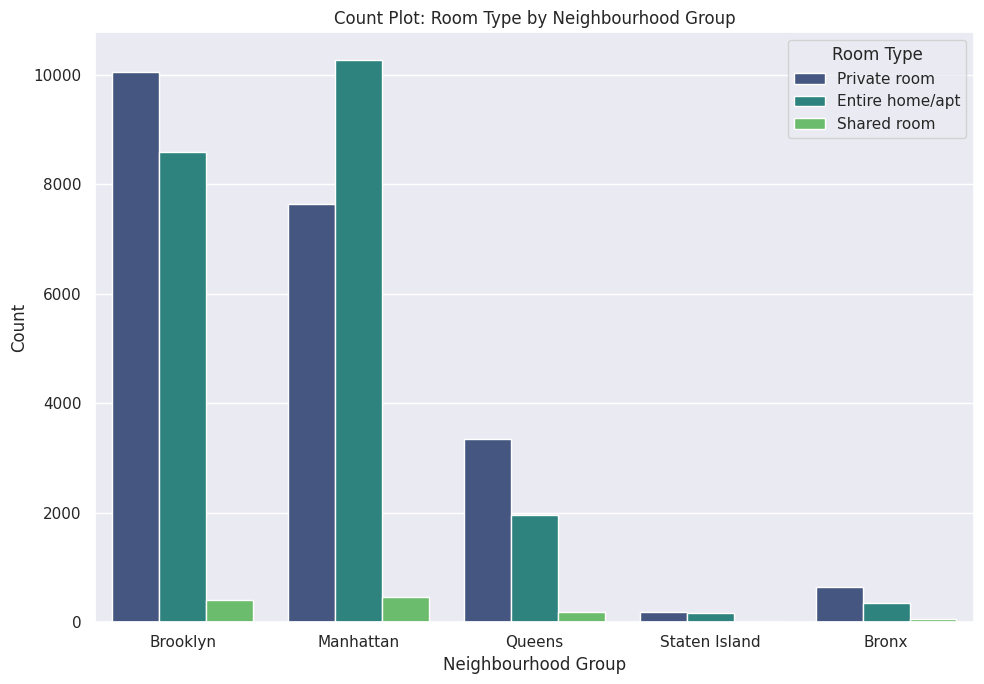

In [ ]:
plt.figure(figsize=(10, 7))

# Count plot for the combination of 'room_type' and 'neighbourhood'
sns.countplot(x='neighbourhood_group', hue='room_type', data=airbnb_df, palette='viridis')

plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Count Plot: Room Type by Neighbourhood Group')
plt.legend(title='Room Type', loc='upper right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Here why I choose this chart -:**

The specific chart chosen is a count plot with the 'room_type' variable plotted against the 'neighbourhood_group' variable. This choice is suitable for visualizing the distribution of different room types within each neighborhood group. Count plots are effective for displaying the frequency or count of categorical variables, making it easy to compare the composition of room types across various neighborhood groups.

##### 2. What is/are the insight(s) found from the chart?

Insights may include identifying which room types are most prevalent in each neighborhood group, understanding overall distribution patterns, and observing any variations in the composition of listings. For example, the chart might reveal that certain room types are more common in specific neighborhoods, helping to understand the Airbnb market dynamics in different areas.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by informing marketing strategies, optimizing listings, and tailoring services to meet demand effectively.

Potentially, if there is a mismatch between room type offerings and demand in specific neighborhoods, leading to lower occupancy rates and negative business impact.

#### Chart - 5  -(Top Neighborhoods by Listing/property using Bar plot)

In [ ]:
# Generating the top 10 neighborhoods and their counts
top_10_neigbourhoods = airbnb_df['neighbourhood'].value_counts().nlargest(10)

# Create a DataFrame from the top 10 neighborhoods
neighborhood_counts_df = pd.DataFrame({'Neighbourhood': top_10_neigbourhoods.index, 'Total Listing Counts': top_10_neigbourhoods.values})
print(neighborhood_counts_df)

        Neighbourhood  Total Listing Counts
0  Bedford-Stuyvesant                  3605
1        Williamsburg                  3595
2              Harlem                  2532
3            Bushwick                  2427
4     Upper West Side                  1680
5        East Village                  1612
6      Hell's Kitchen                  1607
7     Upper East Side                  1602
8       Crown Heights                  1490
9         East Harlem                  1062


Text(0.5, 1.0, 'Listings by Top Neighborhoods in NYC')

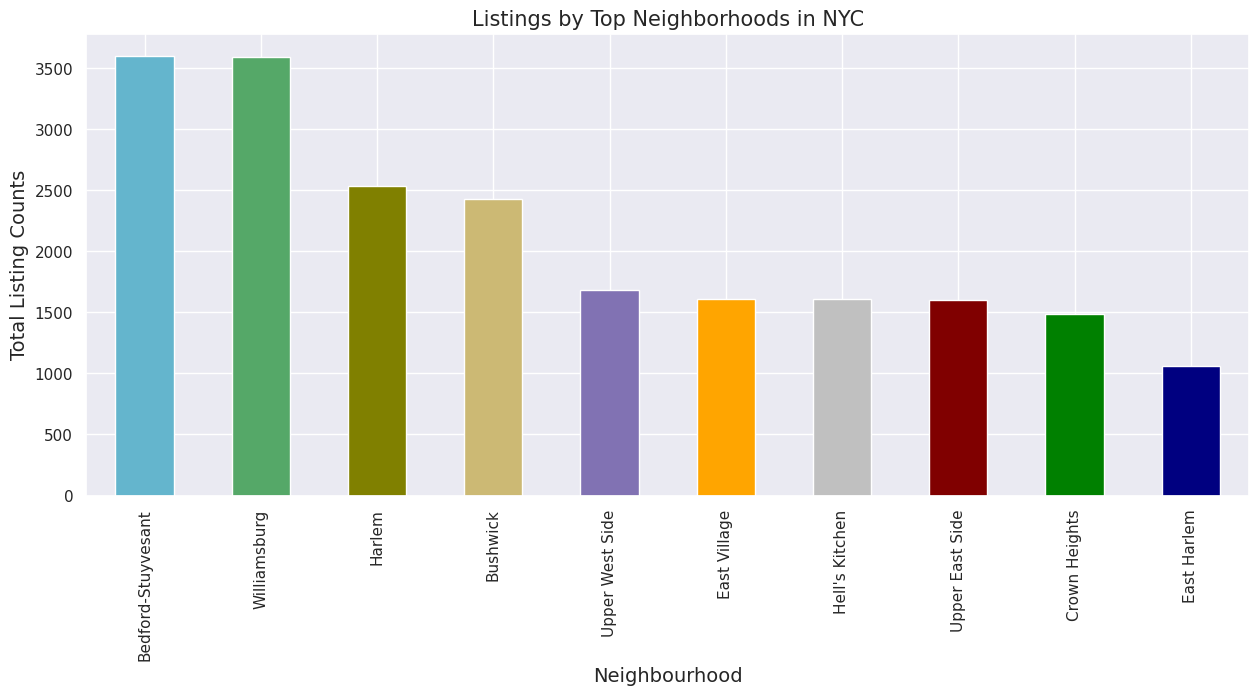

In [ ]:
top_10_neigbourhoods = airbnb_df['neighbourhood'].value_counts().nlargest(10)

# Create a list of colors to use for the bars
colors = ['c', 'g', 'olive', 'y', 'm', 'orange', '#C0C0C0', '#800000', '#008000', '#000080']

# Create a bar plot of the top 10 neighborhoods using the specified colors
top_10_neigbourhoods.plot(kind='bar', figsize=(15, 6), color = colors)

# Set the x-axis label
plt.xlabel('Neighbourhood', fontsize=14)

# Set the y-axis label
plt.ylabel('Total Listing Counts', fontsize=14)

# Set the title of the plot
plt.title('Listings by Top Neighborhoods in NYC', fontsize=15)


##### 1. Why did you pick the specific chart?

**Clear Comparison:** Easily compares the listing counts among the top neighborhoods.

**Insight into Popular Areas:** Identifies the neighborhoods with the highest number of listings.

**Visual Hierarchy:** Utilizes colors for distinction, aiding visualization of the top areas.

**Immediate Impact:** Instantly highlights the prominent neighborhoods for potential viewers.

**Compact Presentation:** Concisely represents the data, focusing on the most relevant information.

##### 2. What is/are the insight(s) found from the chart?

**Neighborhood Popularity:** Clearly identifies the neighborhoods with the highest number of Airbnb listings.

**Market Concentration:** Shows that a few neighborhoods dominate the market, while others have significantly fewer listings.

**Potential Demand:** Indicates areas that might experience higher demand due to more available listings.

**Competitive Analysis:**Helps understand the competitive landscape among different neighborhoods in the short-term rental market.

**Targeting Opportunities:** Offers insights for hosts or businesses to focus marketing efforts on popular neighborhoods for higher visibility and bookings

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*   The top neighborhoods are primarily located in Brooklyn and Manhattan. This may be due to the fact that these boroughs have a higher overall population and a higher demand for housing.

*   The number of listings alone may not be indicative of the overall demand for housing in a particular neighborhood, as other factors such as the cost of living and the availability of housing may also play a role.

#### Chart - 6 (Geographical Distribution of Airbnb Listings in NYC by Neighborhood Group)

6. How is the geographical distribution of Airbnb listings in New York City visualized based on longitude and latitude, with different neighborhood groups distinguished by color?

Solution-:

Text(0.5, 1.0, 'Location Co-ordinates')

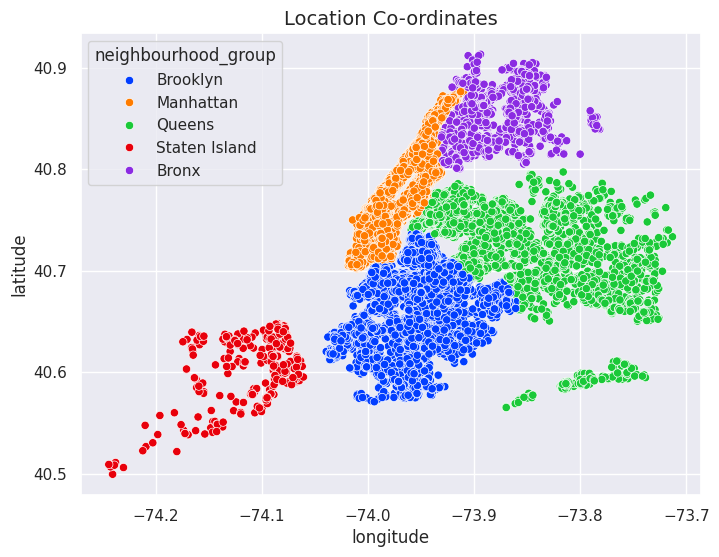

In [6]:
#trying to find where the coordinates belong from the latitude and longitude

# set the default figure size for the seaborn library
sns.set(rc={"figure.figsize": (8, 6)})

# create a scatter plot that displays the longitude and latitude of the listings in the Airbnb NYC dataset
ax = sns.scatterplot(data=airbnb_df, x="longitude", y="latitude", hue='neighbourhood_group', palette='bright')

# set the title of the plot
ax.set_title('Location Co-ordinates', fontsize='14')


##### 1. Why did you pick the specific chart?

The scatter plot with longitude and latitude, distinguishing neighborhood groups by color, is chosen because it effectively visualizes the geographical distribution of Airbnb listings. This type of plot is well-suited for displaying spatial patterns and identifying clusters of listings in different areas.

##### 2. What is/are the insight(s) found from the chart?

Insights can include identifying concentrations of listings in specific neighborhood groups, understanding the spatial distribution of listings throughout New York City, and potentially uncovering patterns or trends related to the geographical preferences of hosts or guests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this chart can contribute positively to business decisions. For example, identifying areas with high listing concentrations can inform marketing strategies, allowing businesses to target specific neighborhoods for promotions or partnerships. Understanding spatial patterns may also aid in optimizing pricing strategies based on the demand in different locations.

There may not necessarily be insights that directly lead to negative growth. However, if the analysis reveals areas with consistently low demand or less favorable conditions for hosting, businesses might reconsider the allocation of resources in those regions. It's important to note that negative growth would depend on the specific context and business goals. For instance, if there's a lack of demand in certain neighborhoods, it might be an opportunity to reevaluate marketing strategies or explore new target audiences.

#### Chart - 7 ( Average Price for Rooms in Neighbourhood Group)

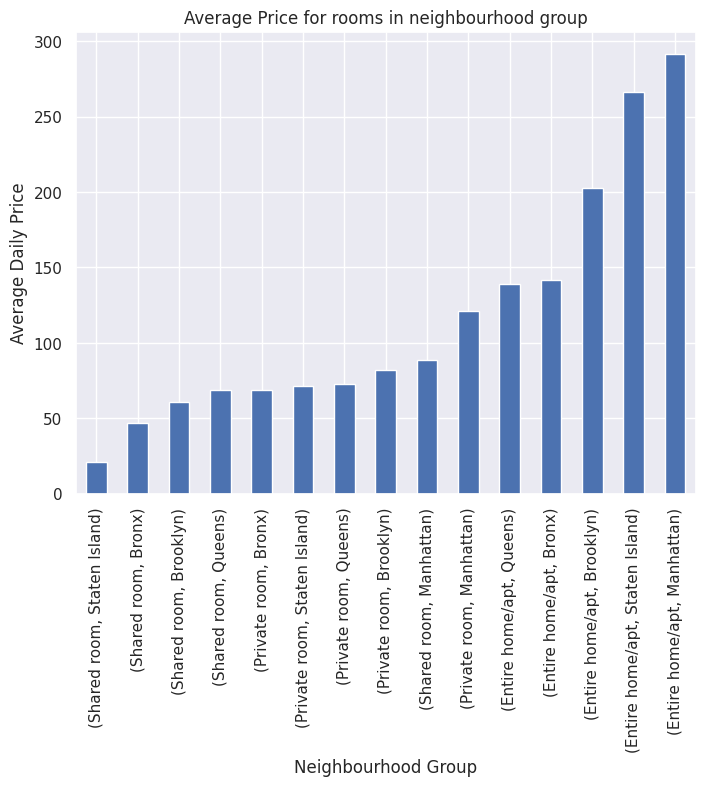

List of Average Price per night based on the neighbourhood group


price
room_type       neighbourhood_group            
Entire home/apt Queens               139.036260
                Bronx                141.541176
                Brooklyn             202.895245
                Staten Island        266.205128
                Manhattan            291.784595
Private room    Bronx                 69.025862
                Staten Island         71.394366
                Queens                72.454958
                Brooklyn              81.713284
                Manhattan            121.434183
Shared room     Staten Island         21.000000
                Bronx                 46.711111
                Brooklyn              60.921212
                Queens                68.459459
                Manhattan             88.462898

In [11]:
temp_df = airbnb_df[airbnb_df["minimum_nights"]==1]
plt.figure(figsize=(8,6))
df1 = temp_df.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()
print('List of Average Price per night based on the neighbourhood group')
pd.DataFrame(df1).sort_values(by='room_type')

##### 1. Why did you pick the specific chart?

The bar chart was chosen for its ability to clearly compare average prices for different room types in various neighborhood groups.

##### 2. What is/are the insight(s) found from the chart?

The chart provides insights into average nightly prices, helping identify pricing trends and differences between room types and neighborhood groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

The insights can positively impact business decisions, guiding pricing strategies, marketing efforts, and resource allocation for optimal performance in specific areas.

**Negative Growth Consideration:**

While no direct insights may lead to negative growth, significantly lower average prices in certain areas could prompt a reevaluation of sustainability and necessitate adjustments in pricing or strategies.

#### Chart - 8 ( Scatter Plot: Price vs. Availability )

8. How does the price of Airbnb listings relate to their availability throughout the year?

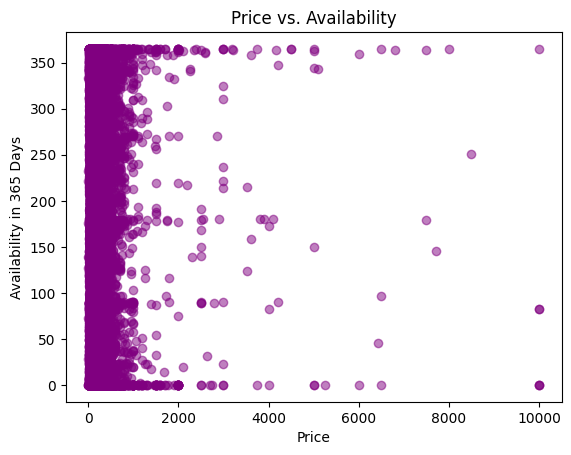

In [4]:
plt.scatter(airbnb_df['price'], airbnb_df['availability_365'], color='purple', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Availability in 365 Days')
plt.title('Price vs. Availability')
plt.show()

##### 1. Why did you pick the specific chart?

**Correlation Check:** Visualizes the relationship between price and availability.

**Individual Data Points:** Shows the spread and concentration of prices concerning availability.

**Trend & Cluster Detection:** Identifies patterns or clusters, indicating price-range-specific availability.

**Outlier Identification:** Spotlights extreme data points for consideration in analysis.

**Data Spread Illustration:** Depicts the overall density and distribution of prices concerning availability.

##### 2. What is/are the insight(s) found from the chart?

**No Clear Price-Availability Trend:** No evident direct link between price and availability.

**Clustered Price Ranges:** Some groups suggest varied availability within specific price ranges.

**Outlier Detection:** Extreme availability at certain prices stands out, requiring further investigation.

**Varied Availability Spread:** Shows availability distribution across prices, hinting at potential market segments.

**Potential Marketing Clues:** Insights may guide targeted marketing for specific price points and availability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Positive Impact:**

**Targeted Marketing:** Tailoring offerings to price clusters for better customer alignment.

**Pricing Optimization:** Adjusting rates based on extreme availability to maximize revenue.

**Efficiency Improvements**: Focused resource allocation for better operational efficiency.

**Potential Negative Impact:**

**Misinformed Pricing Changes:** Misinterpreting outliers might lead to revenue loss.

**Limited Marketing Focus:** Overemphasizing specific clusters could limit customer reach.

**Missed Opportunities:** Focusing too narrowly might overlook other profitable segments.

#### Chart - 9 ( Kernel Density Estimate (KDE) Plot: Price Distribution)

9. What is the estimated probability density function of Airbnb listing prices within the range of $0 to $350?

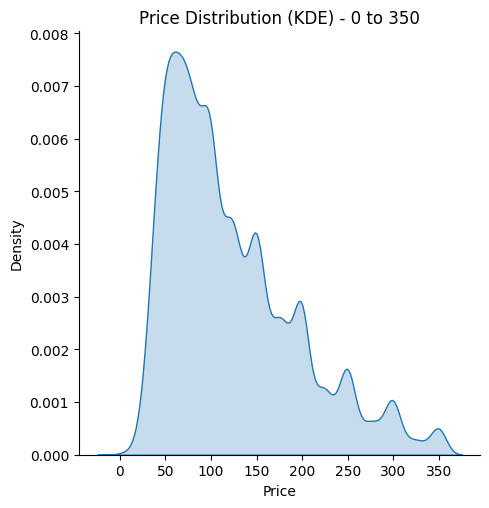

In [5]:
filtered_prices = airbnb_df[(airbnb_df['price'] >= 0) & (airbnb_df['price'] <= 350)]['price']

sns.displot(filtered_prices, kind='kde', fill=True)
plt.title('Price Distribution (KDE) - 0 to 350')
plt.xlabel('Price')
plt.show()

##### 1. Why did you pick the specific chart?

**Visual Distribution:** Shows the density estimation of prices within a specified range, providing a smooth visual representation of price concentration.

**Clarity in Price Spread:** Demonstrates the spread and concentration of prices, particularly within the specified range (0 to 350).

**Kernel Density Estimation:** Offers a smoothed representation of the probability density function for prices within the range.

##### 2. What is/are the insight(s) found from the chart?

* **Concentration of Prices:** Indicates where prices are most concentrated within the specified range.

* **Density Peaks:** Highlights peaks or modes, showing potential price preferences or common ranges within 0 to 350.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Helps in understanding price concentration within a specific range, aiding in strategic pricing decisions or promotions.

**Negative Impact:** Overreliance on this visualization alone might oversimplify pricing strategies, potentially overlooking optimal pricing opportunities or customer preferences outside this range.

#### Chart - 10 (Stacked Bar Chart: Room Type Distribution by Neighbourhood Group)

10. How does the distribution of room types vary across different neighborhood groups in the Airbnb dataset?

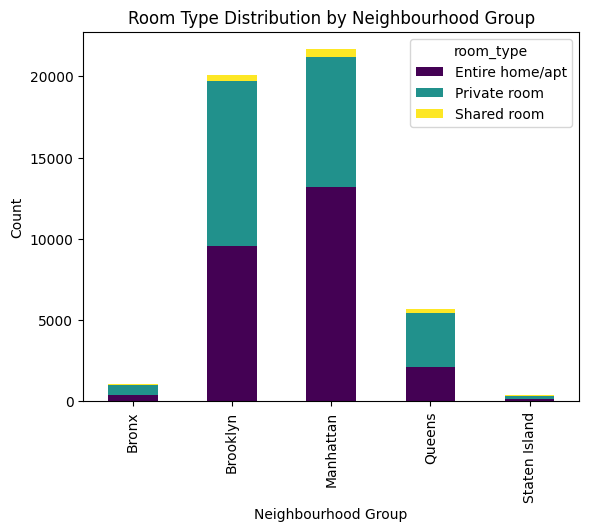

In [6]:
cross_tab = pd.crosstab(airbnb_df['neighbourhood_group'], airbnb_df['room_type'])
cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Room Type Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

**Categorical Comparison:** Visually compares room type distributions across different neighborhood groups effectively.

**Clear Representation:** Presents counts of room types in each neighborhood group distinctly, aiding in easy comparison.

**Stacked Bars for Comparison:** Stacking room types helps visualize their composition within each neighborhood group.

##### 2. What is/are the insight(s) found from the chart?

* **Room Type Distribution Variation:** Shows how room types are distributed across different neighborhood groups.

* **Dominant Room Types:** Identifies which room types are prevalent in each neighborhood group.

* **Comparative View:** Allows comparison of room type distribution among various neighborhood groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Offers insights for targeted marketing or pricing strategies based on room type preferences within specific neighborhood groups.

**Negative Impact:** Overemphasis on room type distribution without considering other factors might lead to oversimplified strategies that overlook customer preferences or demand variations, impacting growth negatively.

#### Chart - 11 (most reviewed room type per month in neighbourhood groups using stripplot)

Text(0.5, 1.0, 'Most Reviewed room_types in each Neighbourhood Groups')

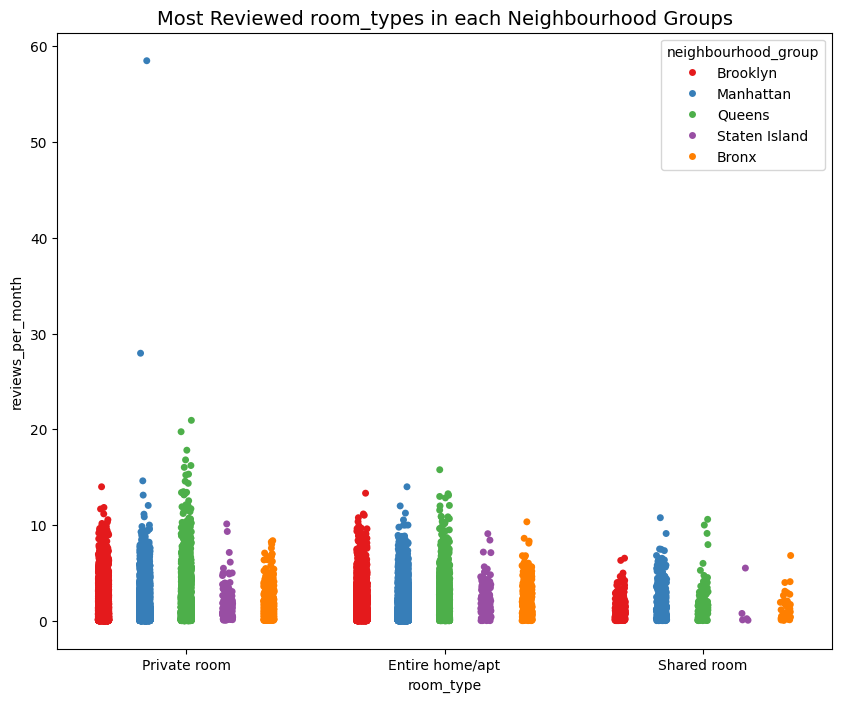

In [8]:
# create a figure with a default size of (10, 8)
f, ax = plt.subplots(figsize=(10, 8))

# create a stripplot that displays the number of reviews per month for each room type in the Airbnb NYC dataset
ax = sns.stripplot(x='room_type', y='reviews_per_month', hue='neighbourhood_group', dodge=True, data=airbnb_df, palette='Set1')

# set the title of the plot
ax.set_title('Most Reviewed room_types in each Neighbourhood Groups', fontsize='14')



##### 1. Why did you pick the specific chart?

Strip plot is a type of scatter plot specifically used in Seaborn to show the distribution of a single categorical variable along with its numeric data

##### 2. What is/are the insight(s) found from the chart?

*   We can see that Private room recieved the most no of reviews/month where Manhattan had the highest reviews received for Private rooms with more than 50 reviews/month, followed by Manhattan in the chase.

*   Manhattan & Queens got the most no of reviews for Entire home/apt room type.

*   There were less reviews recieved from shared rooms as compared to other room types and it was from Staten Island followed by Bronx.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights primarily point toward growth opportunities, particularly by focusing on private rooms and entire apartments in high-demand areas like Manhattan and Queens. However, the limited demand for shared rooms, especially in less popular neighborhoods, can hinder growth. A business should adjust its strategy accordingly to focus on high-demand room types while either improving or minimizing reliance on low-demand segments like shared rooms.

#### Chart - 12 ( Joint Plot: Price and Reviews per Month)

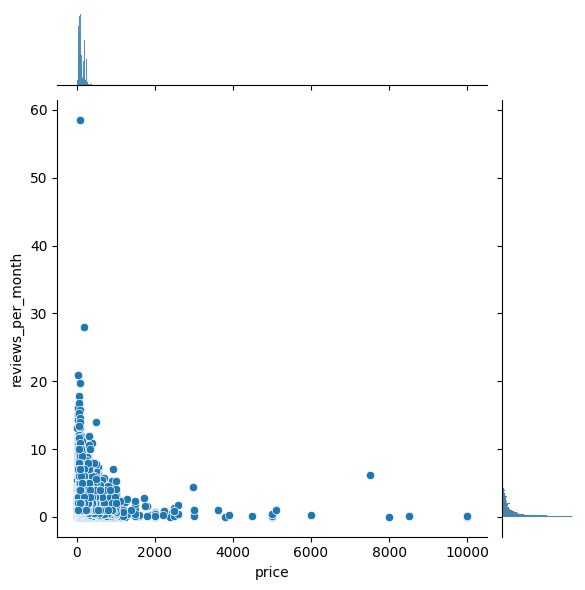

In [9]:
sns.jointplot(x='price', y='reviews_per_month', data=airbnb_df, kind='scatter')
plt.show()

##### 1. Why did you pick the specific chart?

* **Price-Reviews Correlation**
* **Scatter Plot Analysis**
* **Relationship Visualization**

##### 2. What is/are the insight(s) found from the chart?

**Correlation Analysis:**

* Weak correlation

* Sparse distribution

* Limited Correlation

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Positive Impact:**

* **Informed Decision-making:** Helps avoid unnecessary pricing changes based solely on review frequency, preventing potential negative customer reactions and maintaining revenue.

**Potential Negative Impact:**

* **Overlooking Customer Satisfaction:** Relying solely on review frequency might overlook pricing issues affecting customer satisfaction, potentially leading to negative reviews or decreased bookings.

* **Missed Pricing Opportunities:** Ignoring other factors influencing reviews might result in missed pricing strategies that could positively impact customer perception and revenue.

#### Chart - 13 (Area Chart: Availability Over Time)

13. How does the code visualize the trend of availability over time, considering dates after 2000 in the Airbnb dataset?

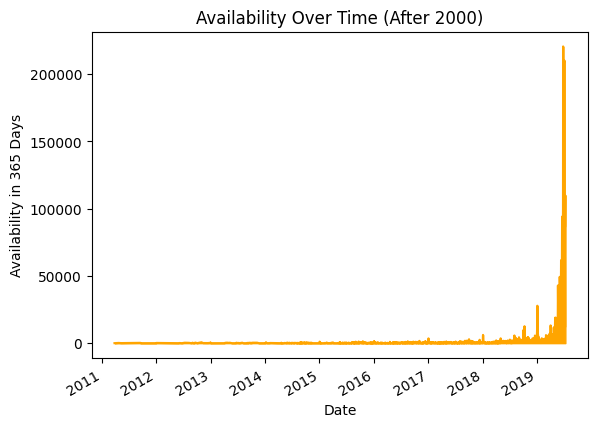

In [10]:
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'], errors='coerce')

# Filtering data for dates after the year 2000
airbnb_df = airbnb_df[airbnb_df['last_review'].dt.year > 2000]

availability_over_time = airbnb_df.groupby('last_review')['availability_365'].sum()
availability_over_time.plot(kind='area', color='orange')

plt.title('Availability Over Time (After 2000)')
plt.xlabel('Date')
plt.ylabel('Availability in 365 Days')
plt.show()

##### 1. Why did you pick the specific chart?

**Temporal Insight:** Depicts availability trends over time after the year 2000.

**Data Aggregation:** Summarizes availability on a temporal scale (date-wise).

**Visualizing Change:** Highlights changes in availability patterns over the specified time period.

**Clarity in Trends:** Provides a clear overview of availability fluctuations in a visually comprehensible manner.

**Insightful Comparison:** Allows for easy comparison of availability changes over time, aiding in identifying seasonal or long-term trends.

##### 2. What is/are the insight(s) found from the chart?

**Identified Availability Trends:** Shows highs and lows over time.

**Patterns & Irregularities:** Highlights any recurring availability patterns.

**Long-Term Shifts Noted:** Indicates major changes in availability trends.

**Seasonal Availability:** Reveals if availability follows seasonal trends.

**Historical Evolution:** Offers insights into how availability has changed over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

* **Strategic Planning:** Helps in predicting demand fluctuations, aiding in inventory management and pricing strategies for peak and off-peak periods.
However, potential negative impacts could arise if these insights are misinterpreted or solely relied upon:

**Potential Negative Impact:**

* **Overlooking Other Factors:** Solely relying on availability trends might overlook broader market dynamics or customer preferences, potentially resulting in misaligned strategies or neglect of other growth opportunities.

#### Chart - 14 Correlation Heatmap

In [16]:
# Calculate pairwise correlations between columns
corr = airbnb_df.corr(numeric_only=True)

# Display the correlation between columns
corr

id   host_id  latitude  longitude  \
id                              1.000000  0.591529 -0.010013   0.103150   
host_id                         0.591529  1.000000  0.012946   0.141095   
latitude                       -0.010013  0.012946  1.000000   0.088152   
longitude                       0.103150  0.141095  0.088152   1.000000   
price                          -0.006647  0.006269  0.031318  -0.155361   
minimum_nights                 -0.073902 -0.051693  0.024808  -0.055418   
number_of_reviews              -0.329865 -0.141819 -0.008746   0.054681   
reviews_per_month               0.291828  0.296417 -0.010142   0.145948   
calculated_host_listings_count  0.098482  0.149412  0.004326  -0.093325   
availability_365                0.006430  0.155082 -0.022228   0.102540   

                                   price  minimum_nights  number_of_reviews  \
id                             -0.006647       -0.073902          -0.329865   
host_id                         0.006269       -0.051693          -0.141819   
latitude                        0.031318        0.024808          -0.008746   
longitude                      -0.155361       -0.055418           0.054681   
price                           1.000000        0.025506          -0.035938   
minimum_nights                  0.025506        1.000000          -0.069368   
number_of_reviews              -0.035938       -0.069368           1.000000   
reviews_per_month              -0.030608       -0.121702           0.549868   
calculated_host_listings_count  0.052903        0.073479          -0.059784   
availability_365                0.078234        0.101686           0.193557   

                                reviews_per_month  \
id                                       0.291828   
host_id                                  0.296417   
latitude                                -0.010142   
longitude                                0.145948   
price                                   -0.030608   
minimum_nights                          -0.121702   
number_of_reviews                        0.549868   
reviews_per_month                        1.000000   
calculated_host_listings_count          -0.009421   
availability_365                         0.185791   

                                calculated_host_listings_count  \
id                                                    0.098482   
host_id                                               0.149412   
latitude                                              0.004326   
longitude                                            -0.093325   
price                                                 0.052903   
minimum_nights                                        0.073479   
number_of_reviews                                    -0.059784   
reviews_per_month                                    -0.009421   
calculated_host_listings_count                        1.000000   
availability_365                                      0.182911   

                                availability_365  
id                                      0.006430  
host_id                                 0.155082  
latitude                               -0.022228  
longitude                               0.102540  
price                                   0.078234  
minimum_nights                          0.101686  
number_of_reviews                       0.193557  
reviews_per_month                       0.185791  
calculated_host_listings_count          0.182911  
availability_365                        1.000000

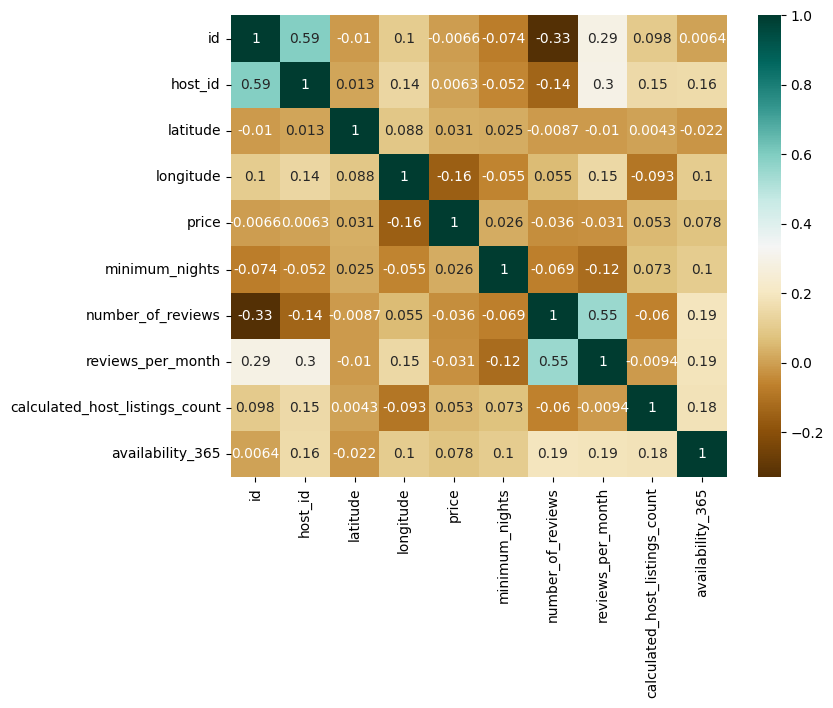

In [18]:
# Set the figure size
plt.figure(figsize=(8,6))

# Visualize correlations as a heatmap
sns.heatmap(corr, cmap='BrBG',annot=True)

# Display heatmap
plt.show()

##### 1. Why did you pick the specific chart?

* **Multivariate Insight:** Allows simultaneous observation of correlations among multiple variables.
* **Efficient Visual Representation:** Color coding quickly identifies strong positive and negative correlations.
* **Precise Details:** Annotated values provide exact correlation coefficients for each relationship.
* **Comprehensive View:** Offers a holistic understanding of inter-variable relationships.
* **Detects Multicollinearity:** Assists in identifying potential multicollinearity concerns for modeling purposes.

##### 2. What is/are the insight(s) found from the chart?

**Price and Availability:** A subtle negative correlation.

**Number of Reviews and Reviews per Month:** Positively correlated.

**Overall Low Correlation:** Most variables show weak linear relationships.

**Independence of Variables**: Limited multicollinearity risk.

**Geographic Coordinates:** Weakly associated with other features.Answer Here

#### Chart - 15 -  (Pair Plot of numerical features by room type)

15. How do different numerical features vary among different room types in the Airbnb dataset?

Solution-:

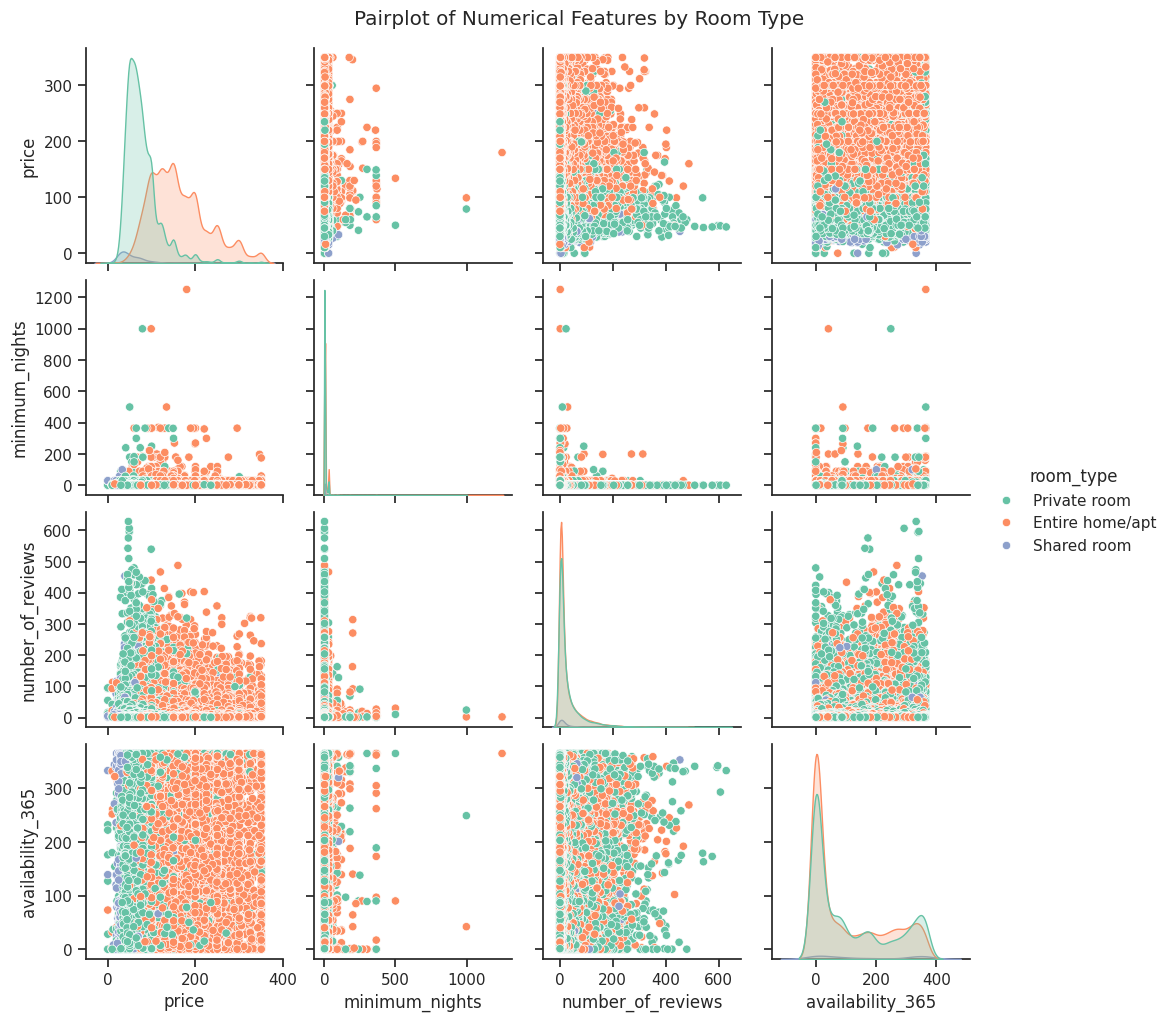

In [19]:
filtered_data = airbnb_df[(airbnb_df['price'] >= 0) & (airbnb_df['price'] <= 350)]

# Customize Seaborn style and pairplot settings
sns.set(style='ticks')  # Setting the overall style

# Create pairplot with different colors for different room types
g = sns.pairplot(filtered_data[['price', 'minimum_nights', 'number_of_reviews', 'availability_365', 'room_type']],
                 hue='room_type', palette='Set2')
g.fig.suptitle('Pairplot of Numerical Features by Room Type', y=1.02)  # Adjusting the title position
plt.show()

##### 1. Why did you pick the specific chart?

1. **Multivariate Insights**: Pairplot enables the simultaneous visualization of multiple numerical features, aiding in assessing correlations and distributions.

2. **Room Type Differentiation:** Using hue to distinguish room types allows for a comparative analysis of patterns across different accommodation categories.

3. **Comprehensive Assessment:** It offers a holistic view of relationships between variables, aiding in identifying potential correlations between price, minimum nights, reviews, and availability across various room types.

4. **Quick Pattern Recognition:** The visual grid layout allows for rapid identification of any outliers, clusters, or trends within and across the different room types.

5. **Enhanced Data Understanding:** It's an effective way to comprehend the interplay of various numerical features concerning different room types, facilitating deeper insights into their relationships.

##### 2. What is/are the insight(s) found from the chart?


* **Price Distribution:** Visualizing how pricing varies across room types, indicating potential market segments based on affordability.

* **Minimum Nights:** Understanding the minimum nights' distribution suggests flexibility in stay duration preferences for different room types.

* **Number of Reviews**: Revealing room types with higher or lower engagement levels, aiding in assessing popularity or satisfaction levels.

* **Availability:** Exploring availability patterns can hint at the demand for specific room types throughout the year.

* **Room Type Differentiation:** The pairplot colors each room type differently, aiding in easily differentiating trends and distributions specific to each type.


#### Chart - 16 - Pair Plot

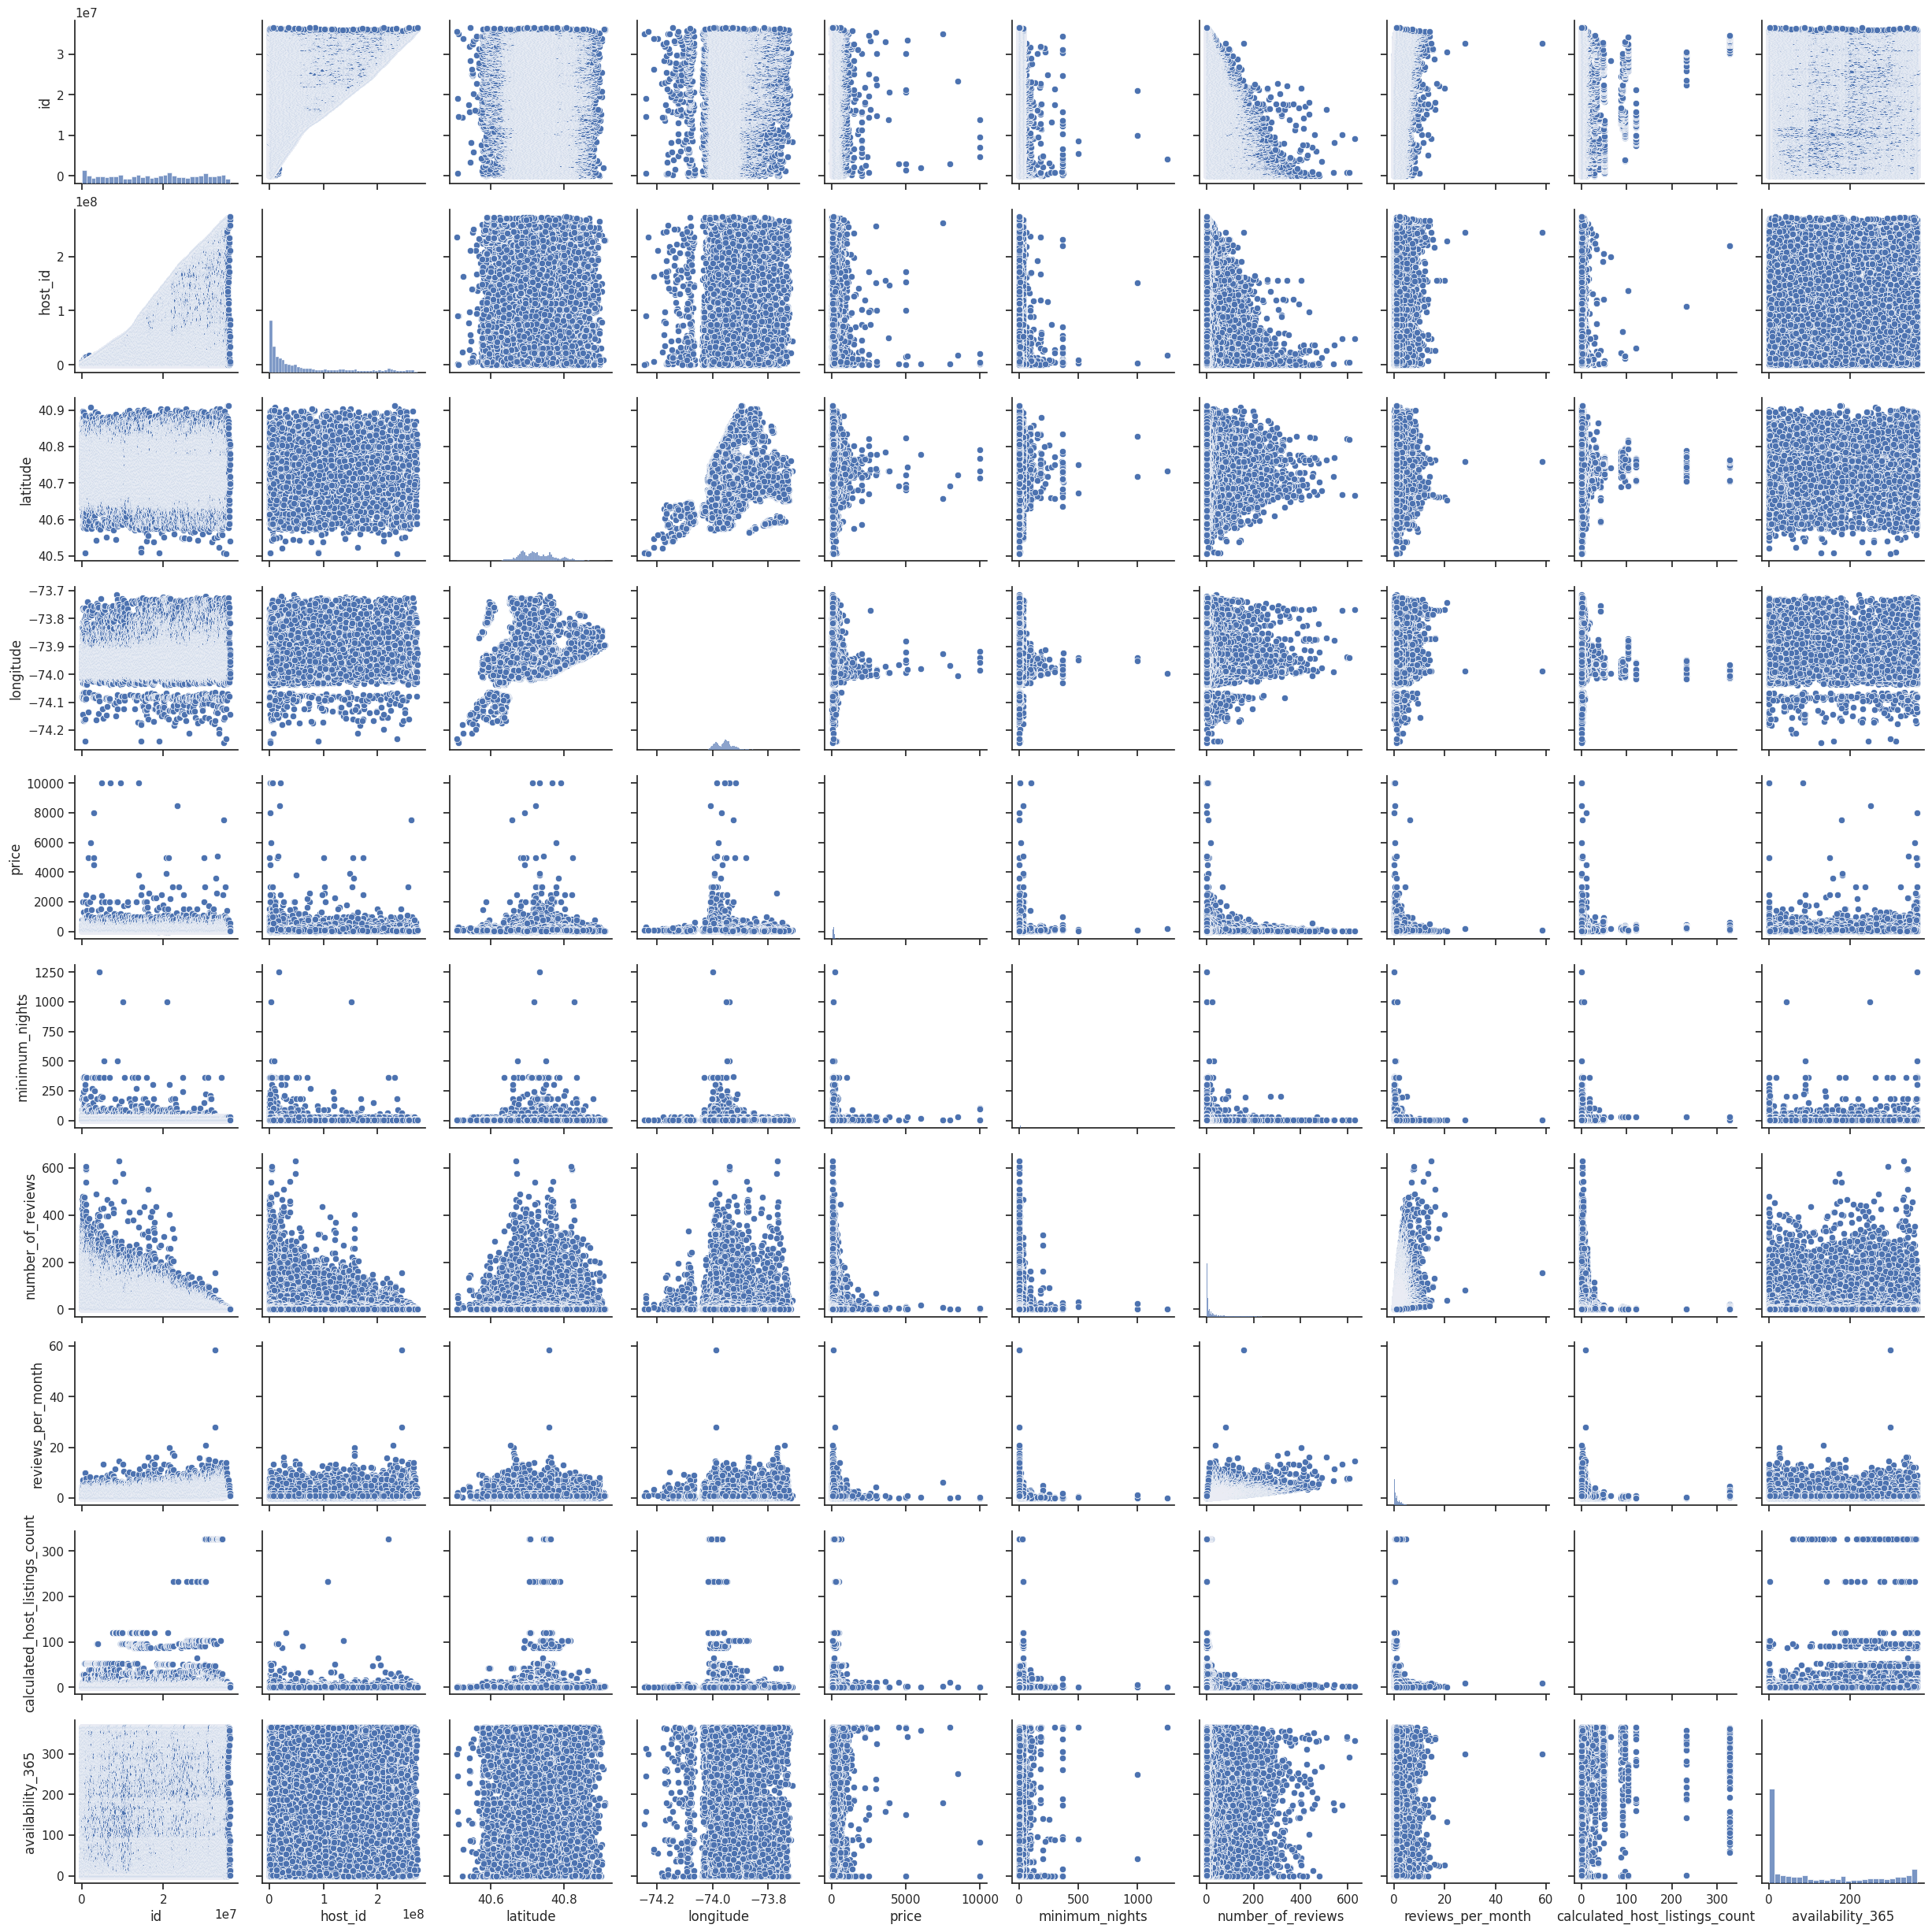

In [20]:
sns.pairplot(airbnb_df)

# show the plot
plt.show()

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

* **Dynamic Pricing:** Implement adaptable pricing models.
* **Enhanced Communication:** Foster better engagement between hosts and guests.
* **Feedback System:** Develop a robust feedback mechanism for prompt issue resolution.
* **Host Incentives:** Offer rewards to hosts for better service.
* **Localized Marketing:** Customize promotions based on neighborhood trends.
* **Personalization:** Tailor experiences based on user preferences.
* **Platform Stability:** Ensure a user-friendly and stable platform.
* **New Host Support**: Offer resources for seamless onboarding.
* **Booking Analysis:** Analyze user behavior for optimized offerings.
* **Adaptation:** Stay updated and adapt to industry changes for sustained growth.

# **Conclusion**

![Airbnb Image](https://media.licdn.com/dms/image/D4E12AQGC_7wjCL7KsQ/article-cover_image-shrink_720_1280/0/1706741605383?e=2147483647&v=beta&t=bIcB8D646db5PnVxe9ZE8gpP4WA-ZGGmS0bFazIUkRw)

* Neighborhood-based pricing insights can inform targeted pricing strategies.
* Room type distribution knowledge assists in focused marketing efforts.
* Geographic variations affect pricing dynamics and target customer segments.
* Host activity influences customer satisfaction levels.
* Competitive analysis supports strategic positioning in the market.
* Data-driven decisions optimize marketing tactics and pricing strategies.



### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***